
# Partial Factors
This script is to show how partial factors $\gamma_E$ and $\gamma_R$ for Effect E and Resistance R are determined by the required reliability index $ \beta $. Also, it is relevant to understand that larger spread of E or R necessarily leads to  larger partial factors to obtain the same reliability index $ \beta $. This spread is calculated from the coefficient of variation (v=$\frac{\sigma}{\mu}$) for both E and R.

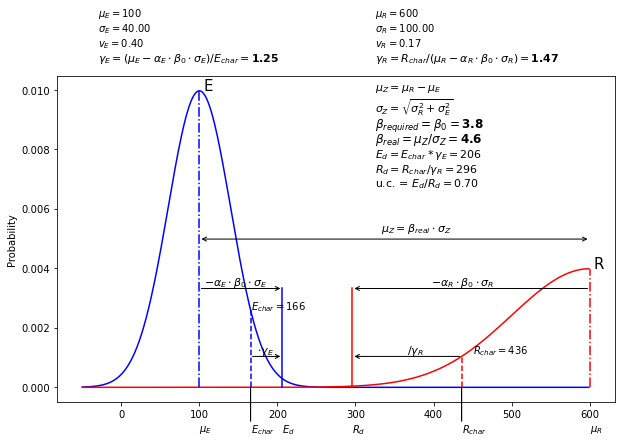

In [186]:
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from scipy.stats import norm

# Plot x-axis range with 1 steps.
lowerx = -50
upperx = 600
x_axis = np.arange(lowerx, upperx, 1)

# figure size in inches
plt.figure(figsize=(10, 6))

# assume the following E distribution:
meanE =100
sdE = 40
COV_E= sdE / meanE
Echar=meanE+1.64*sdE
probE=(1/(sdE*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdE**2))
probEchar=(1/(sdE*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdE)**2)/(2*sdE**2))

# assume the following R distribution:
meanR = 510
sdR = 50
COV_R = sdR / meanR
Rchar=meanR-1.64*sdR
probR=(1/(sdR*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdR**2))
probRchar=(1/(sdR*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdR)**2)/(2*sdR**2))

# calculate partial safety factors - here beta is used as starting point, as the required reliability index
# from beta and the distribution of E and R the partial factors are derived according to equation (4.44) of
# Schneider and Vrouwenvelder (2017)
alpha_E = -0.7
alpha_R = +0.8
beta_0 = 3.8
gamma_E = (meanE-alpha_E*beta_0*sdE) / Echar
gamma_R = Rchar / (meanR-alpha_R*beta_0*sdR)

#determine some parameters to draw text annotations in the right position in the graph
vertscale = max(probE,probR)
horscale = upperx-lowerx

#plot the values of mean, sigma, coefficient of variation and gamma for E
plt.text(meanE-horscale/5,vertscale+5*vertscale/20, "$\mu_E=$"+'{0:.0f}'.format(meanE), fontsize=10)
plt.text(meanE-horscale/5,vertscale+4*vertscale/20, "$\sigma_E=$"+'{0:.2f}'.format(sdE), fontsize=10)
plt.text(meanE-horscale/5,vertscale+3*vertscale/20, "$v_E=$"+'{0:.2f}'.format(COV_E), fontsize=10)
plt.text(meanE-horscale/5,vertscale+2*vertscale/20, 
         "$\gamma_E= (\\mu_E-\\alpha_E \\cdot \\beta_0 \\cdot \\sigma_E)/E_{char}= $"+'{0:.2f}'.format(gamma_E), fontsize=11, fontweight='bold')

#plot the values of mean, sigma, coefficient of variation and gamma for R
plt.text(horscale/2,vertscale+5*vertscale/20, "$\mu_R=$"+'{0:.0f}'.format(meanR), fontsize=10)
plt.text(horscale/2,vertscale+4*vertscale/20, "$\sigma_R=$"+'{0:.2f}'.format(sdR), fontsize=10)
plt.text(horscale/2,vertscale+3*vertscale/20, "$v_R=$"+'{0:.2f}'.format(COV_R), fontsize=10)
plt.text(horscale/2,vertscale+2*vertscale/20, 
         "$\gamma_R= R_{char}/(\\mu_R-\\alpha_R \\cdot \\beta_0 \\cdot \\sigma_R)= $"+'{0:.2f}'.format(gamma_R), fontsize=11, fontweight='bold')

# Design values for E and R
# 5% characteristic values * or / gamma
Ed = (meanE+1.64*sdE)*gamma_E
Rd = (meanR-1.64*sdR)/gamma_R

# calculation reliability function
meanZ = meanR-meanE
sdZ   = math.sqrt(sdE**2+sdR**2)
probZ = (1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
# calculate reliability index beta
beta  = meanZ/sdZ


# plot normal distribution curves for E (blue) and R (red)
plt.plot(x_axis, norm.pdf(x_axis, meanE, sdE),'b')
plt.plot(x_axis, norm.pdf(x_axis, meanR, sdR), 'r')
#plt.plot(x_axis, norm.pdf(x_axis, meanZ, sdZ), 'g')

plt.text(meanE+5, probE, 'E', fontsize=15)
plt.text(Echar, probEchar, "$E_{char}=$"+'{0:.0f}'.format(meanE+1.64*sdE), fontsize=10)
#plt.text(meanE+2.8*sdE*gamma_E, probEchar*0.7, '$E_d$', fontsize=10)

# plot averages with dash-dotted red/blue lines
plt.plot([meanR,meanR],[0,probR], 'r-.')
plt.plot([meanE,meanE],[0,probE], 'b-.')
#plt.plot([meanZ,meanZ],[0,probZ], 'g-.')

# plot 5%-characteristic value with dashed red/blue lines
plt.plot([Rchar,Rchar],[0,probRchar], 'r--')
plt.plot([Echar,Echar],[0,probEchar], 'b--')

# plot dimensioning value with drawn red/blue lined
plt.plot([Rd,Rd],[0,vertscale/3], 'r-')
plt.plot([Ed,Ed],[0,vertscale/3], 'b-')

plt.text(meanR+5, probR, 'R', fontsize=15)
plt.text(meanR-1.5*sdR, probRchar*1.1, "$R_{char}=$"+'{0:.0f}'.format(meanR-1.64*sdR), fontsize=10)
#plt.text(meanR-4.5*sdR/gamma_R, probEchar*0.7, '$R_{d}$', fontsize=10)

plt.text(horscale/2,vertscale, "$\\mu_Z = \\mu_R - \mu_E $", fontsize=11)
plt.text(horscale/2,vertscale-1.5*vertscale/20, "$\\sigma_Z = \sqrt{\sigma_R^2 + \sigma_E^2} $", fontsize=11)
plt.text(horscale/2,vertscale-2.5*vertscale/20, "$\\beta_{required} = \\beta_0 = $"+'{0:.1f}'.format(beta_0), fontsize=12, fontweight='bold')
plt.text(horscale/2,vertscale-3.5*vertscale/20, "$\\beta_{real} = \\mu_Z / \\sigma_Z = $"+'{0:.1f}'.format(beta), fontsize=12, fontweight='bold')
plt.text(horscale/2,vertscale-4.5*vertscale/20, "$E_d = E_{char}*\gamma_E=$"+'{0:.0f}'.format(Ed), fontsize=11)
plt.text(horscale/2,vertscale-5.5*vertscale/20, "$R_d = R_{char}/\gamma_R=$"+'{0:.0f}'.format(Rd), fontsize=11)
plt.text(horscale/2,vertscale-6.5*vertscale/20, "u.c. = $E_d / R_d = $"+'{0:.2f}'.format(Ed/Rd), fontsize=11)


# arrow for beta
plt.annotate('',
            xy=(meanE, probE/2),
            xytext=(meanR, probE/2), 
            va='center',
            ha='center',
            arrowprops={'arrowstyle': '<->'})
plt.text((meanR-meanE)/1.5,probE/1.9, "$\\mu_Z = \\beta_{real} \\cdot \\sigma_Z $", fontsize=11)

# arrow from mean E to Ed
plt.annotate('',
            xy=(meanE, probE/3),
            xytext=(Ed, probE/3), 
            va='center',
            ha='center',
            arrowprops={'arrowstyle': '<-'})
plt.text((Ed-meanE)/1,probE/2.9, "$-\\alpha_E \\cdot \\beta_0 \\cdot \\sigma_E $", fontsize=11)

# arrow from mean R back to Rd
plt.annotate('',
            xy=(meanR, probE/3),
            xytext=(Rd, probE/3), 
            va='center',
            ha='center',
            arrowprops={'arrowstyle': '<-'})
plt.text(Rd+(meanR-Rd)/3,probE/2.9, "$-\\alpha_R \\cdot \\beta_0 \\cdot \\sigma_R $", fontsize=11)

# arrow from Echar to Ed
plt.annotate('',
            xy=(Echar, probRchar),
            xytext=(Ed, probRchar), 
            va='center',
            ha='center',
            arrowprops={'arrowstyle': '<-'})
plt.text(Echar*1.05,probRchar*1.1, "$ \\cdot \\gamma_E$", fontsize=11)

# arrow from Ed ro Rd
#plt.annotate('',
#            xy=(Ed, probRchar),
#            xytext=(Rd, probRchar), 
#            va='center',
#            ha='center',
#            arrowprops={'arrowstyle': '<->'})
#plt.text((Ed+(Rd-Ed)/4),probRchar*1.1, "$ R_d - E_d$", fontsize=11)


# arrow from Rchar back to Rd
plt.annotate('',
            xy=(Rchar, probRchar),
            xytext=(Rd, probRchar), 
            va='center',
            ha='center',
            arrowprops={'arrowstyle': '<-'})
plt.text(Rchar+(Rd-Rchar)/2,probRchar*1.1, "$ / \\gamma_R$", fontsize=11)

plt.annotate('$\\mu_E$', (meanE, -0.000), 
            xytext=(meanE, -0.0012), 
            rotation=0, va='top', 
            arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': ' '})

plt.annotate('$E_{char}$', (Echar, -0.000), 
            xytext=(Echar, -0.0012), 
            rotation=0, va='top', 
            arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '-'})

plt.annotate('$E_d$', (Ed, -0.000), 
            xytext=(Ed, -0.0012), 
            rotation=0, va='top', 
            arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': ' '})

plt.annotate('$R_d$', (Rd, -0.000), 
            xytext=(Rd, -0.0012), 
            rotation=0, va='top', 
            arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': ' '})

plt.annotate('$R_{char}$', (Rchar, -0.000), 
            xytext=(Rchar, -0.0012), 
            rotation=0, va='top', 
            arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': '-'})

plt.annotate('$\\mu_R$', (meanR, -0.000), 
            xytext=(meanR, -0.0012), 
            rotation=0, va='top', 
            arrowprops = {'width': 0, 'headwidth': 0, 'linestyle': ' '})


#plt.xlabel("Effect (E, left) vs. Resistance (R, right) [unit could be e.g. load in kN or stress in MPa]")
plt.ylabel("Probability")
#plt.xticks([])
#plt.yticks([])
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])
filename = "partial_factors_COVR_"+str('{0:.2f}'.format(COV_R))+ \
    "_beta_"+str('{0:.2f}'.format(beta))+ \
    "_uc+"+str('{0:.2f}'.format(Ed/Rd))+ \
    ".pdf"
plt.savefig(filename, format="pdf", bbox_inches="tight")
